In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

<hr style="border: 1px solid gray"></hr>

- Airline wants to schedule their flight services from Nagpur Airport
- Airline has aircraft of different capacity(and hence different cost)
- Airline want multi-city-flights to connect different cities through a single flight

```
1. Nagpur - 21.1458° N, 79.0882° E (Source)
2. Guwahati - 26.1445° N, 91.7362° E
3. Patna - 25.5941° N, 85.1376° E
4. jaipur - 26.9124° N, 75.7873° E
5. goa - 15.2993° N, 74.1240° E
6. Chennai - 13.0827° N, 80.2707° E

```

a. **Task1: Need to calculate distance for different destination airports** \
b. **Task2: Need to calcu;ate the distances for some destination via connecting cites** \
c. **Task3: Need to find cites in similar direction**

In [2]:
# data for the cities will be int value of lat long
nagpur, guahati, patna, jaipur, goa, channai = (79,21), (91, 26), (85, 25), (75, 26), (73, 15), (80, 13)
nagpur

(79, 21)

In [3]:
# calculate distance between two points using Pythagorean theorem
x = patna[0] - nagpur[0]
y = patna[1] - nagpur[1]
distance = np.sqrt(x**2 + y**2)
print(f"Distance between Nagpur and Patna: {distance} units")

Distance between Nagpur and Patna: 7.211102550927978 units


In [4]:
destinations = np.array([guahati, patna, jaipur, goa, channai])
source = np.array(nagpur)

In [5]:
distances = np.sum((destinations - source) ** 2, axis=1)**0.5  # Using Euclidean distance formula
print("Distances from Nagpur to other cities:", distances)

Distances from Nagpur to other cities: [13.          7.21110255  6.40312424  8.48528137  8.06225775]


In [6]:
# ønly by this distance we can't find the direction of the cities
# Now if we save the x and y coordinates of the cities, we can find the direction
# and then we can find the cities in similar direction

vectors = destinations - source  # Vectors from source to each destination
vectors



array([[12,  5],
       [ 6,  4],
       [-4,  5],
       [-6, -6],
       [ 1, -8]])

In [7]:
angles = np.arctan2(vectors[:, 1], vectors[:, 0])  # Calculate angles of the vectors
print("Angles of the vectors from Nagpur to other cities:", angles)

Angles of the vectors from Nagpur to other cities: [ 0.39479112  0.5880026   2.24553727 -2.35619449 -1.44644133]


In [8]:
np.linalg.norm(vectors, axis=1)  # Calculate the magnitude of each vector

array([13.        ,  7.21110255,  6.40312424,  8.48528137,  8.06225775])

In [9]:
# What kind of opreations we can do with these vectors?
# scalar multiplication, vector addition, dot product, cross product, etc.

# s bar + r bar == r bar + s bar call commutative property
# s bar + r bar == s bar + r bar call associative property
# s bar + r bar == r bar + s bar call distributive property


In [10]:
# finding the distance between patna and Guahati
PG = vectors[1] - vectors[0] 
np.linalg.norm(PG)  # Calculate the distance between Patna and Guahati

np.float64(6.082762530298219)

In [16]:
similarity_matrix = cosine_similarity(vectors)
idx = ['guahati', 'patna', 'jaipur', 'goa', 'channai']
similarity_matrix

array([[ 1.        ,  0.98139265, -0.27630742, -0.9246781 , -0.26715174],
       [ 0.98139265,  1.        , -0.08662962, -0.98058068, -0.4472136 ],
       [-0.27630742, -0.08662962,  1.        , -0.11043153, -0.85232273],
       [-0.9246781 , -0.98058068, -0.11043153,  1.        ,  0.61394061],
       [-0.26715174, -0.4472136 , -0.85232273,  0.61394061,  1.        ]])

In [17]:
similarity_matrix = pd.DataFrame(similarity_matrix, columns=idx, index=idx)
similarity_matrix

,guahati,patna,jaipur,goa,channai
guahati,1.000000,0.981393,-0.276307,-0.924678,-0.267152
patna,0.981393,1.000000,-0.086630,-0.980581,-0.447214
jaipur,-0.276307,-0.086630,1.000000,-0.110432,-0.852323
goa,-0.924678,-0.980581,-0.110432,1.000000,0.613941
channai,-0.267152,-0.447214,-0.852323,0.613941,1.000000


<Axes: >

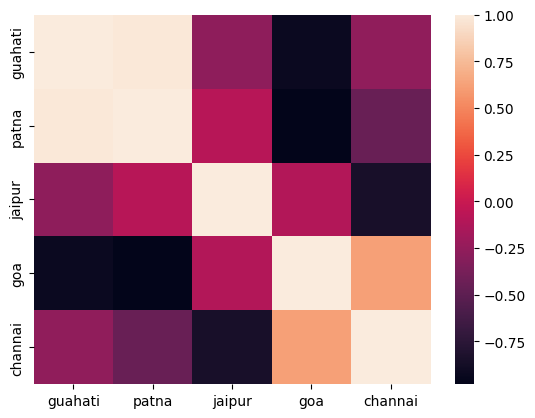

In [18]:
sns.heatmap(similarity_matrix)

In [ ]:
# In this code we are trying build a movie recommender system with the help of cosin similarity of vectors
rating = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [23]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [24]:
rating_df = pd.merge(rating, movies[['movieId', 'title']], on='movieId')

In [25]:
rating_df = rating_df[['userId', 'movieId', 'rating', 'title']]

In [26]:
rating_df.head()

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,"Usual Suspects, The (1995)"


In [27]:
rating_df

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,"Usual Suspects, The (1995)"
...,...,...,...,...
20000258,138493,68954,4.5,Up (2009)
20000259,138493,69526,4.5,Transformers: Revenge of the Fallen (2009)
20000260,138493,69644,3.0,Ice Age: Dawn of the Dinosaurs (2009)
20000261,138493,70286,5.0,District 9 (2009)


In [29]:
n_users = 1000  # Example: Top 1000 users
top_users = rating_df['userId'].value_counts().nlargest(n_users).index
rating_df_filtered = rating_df[rating_df['userId'].isin(top_users)]

# Reduce the number of movies
n_movies = 90 # Example: Top 90 movies
top_movies = rating_df['movieId'].value_counts().nlargest(n_movies).index
rating_df_filtered = rating_df_filtered[rating_df_filtered['movieId'].isin(top_movies)]

pivot_movie_based = pd.pivot_table(rating_df_filtered, index='title', columns='userId', values='rating')

In [ ]:
from scipy import sparse
sparse_pivot = sparse.csr_matrix(pivot_movie_based.fillna(0))
# cosin similarity calculations of vector
similarity_mat = cosine_similarity(sparse_pivot)
similarity_mat


array([[1.        , 0.79537288, 0.80169768, ..., 0.76860111, 0.76704188,
        0.81922555],
       [0.79537288, 1.        , 0.82848204, ..., 0.74960159, 0.81274689,
        0.85044022],
       [0.80169768, 0.82848204, 1.        , ..., 0.79118874, 0.82789632,
        0.88814424],
       ...,
       [0.76860111, 0.74960159, 0.79118874, ..., 1.        , 0.71217559,
        0.80699707],
       [0.76704188, 0.81274689, 0.82789632, ..., 0.71217559, 1.        ,
        0.82398818],
       [0.81922555, 0.85044022, 0.88814424, ..., 0.80699707, 0.82398818,
        1.        ]], shape=(90, 90))

In [31]:
similarity_df = pd.DataFrame(similarity_mat, columns=pivot_movie_based.index, index=pivot_movie_based.index)
# recommender_df = p
similarity_df

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),American Beauty (1999),Apollo 13 (1995),Babe (1995),Back to the Future (1985),Batman (1989),Batman Forever (1995),...,"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: Pet Detective (1994),1.000000,0.795373,0.801698,0.804263,0.823465,0.792534,0.740517,0.852192,0.843847,0.801901,...,0.837221,0.784702,0.833999,0.841627,0.818120,0.796964,0.820391,0.768601,0.767042,0.819226
Aladdin (1992),0.795373,1.000000,0.828482,0.827768,0.838209,0.823967,0.803584,0.873126,0.855901,0.813317,...,0.846367,0.835849,0.882907,0.830754,0.833872,0.803517,0.833415,0.749602,0.812747,0.850440
Alien (1979),0.801698,0.828482,1.000000,0.959486,0.909304,0.874975,0.808727,0.921993,0.911825,0.822614,...,0.946182,0.853793,0.905330,0.873701,0.915043,0.830030,0.914137,0.791189,0.827896,0.888144
Aliens (1986),0.804263,0.827768,0.959486,1.000000,0.894006,0.863935,0.810319,0.919659,0.903812,0.818748,...,0.942264,0.849102,0.901246,0.877071,0.905917,0.827084,0.904235,0.803873,0.826110,0.887572
American Beauty (1999),0.823465,0.838209,0.909304,0.894006,1.000000,0.894290,0.826847,0.931678,0.910259,0.826758,...,0.917371,0.873961,0.916996,0.873133,0.918453,0.826020,0.938120,0.772036,0.831435,0.888197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Twister (1996),0.796964,0.803517,0.830030,0.827084,0.826020,0.848178,0.772650,0.865884,0.856080,0.822025,...,0.844935,0.838044,0.845055,0.858144,0.820288,1.000000,0.819484,0.799638,0.781000,0.834682
"Usual Suspects, The (1995)",0.820391,0.833415,0.914137,0.904235,0.938120,0.897119,0.816250,0.933785,0.912586,0.820269,...,0.928631,0.854073,0.914824,0.879320,0.929559,0.819484,1.000000,0.773332,0.834318,0.885094
Waterworld (1995),0.768601,0.749602,0.791189,0.803873,0.772036,0.777501,0.709868,0.811478,0.811559,0.773822,...,0.809484,0.759707,0.783175,0.804931,0.789277,0.799638,0.773332,1.000000,0.712176,0.806997


In [35]:
recommender_df = pd.DataFrame(similarity_df['Twister (1996)'].sort_values(ascending=False))
recommender_df.head()

,Twister (1996)
title,
Twister (1996),1.000000
Jurassic Park (1993),0.876199
Independence Day (a.k.a. ID4) (1996),0.875875
Speed (1994),0.871586
"Sixth Sense, The (1999)",0.866939


In [ ]:
# What are projection vector?
